<div align="center">
<h1 style="color:#1565c0; font-size:2.8em; font-weight:bold; margin-bottom:0.2em; margin-top:0.5em;">Практична робота №4</h1>
<h3 style="color:#1976d2; margin-top:0; font-weight:normal;">Кластеризацiя засобами
бiблiотеки Scikit-Learn Python <b>Scikit-Learn Python</b></h3>
<br>
<br>
<b>Варіант 12</b><br>
<b>Автори:</b><br>
Плахтій Злата, КА-32<br>
Пастушенко Максим, КА-33<br>
Романов Фелікс, КА-33
</div>


<b>Хід роботи:</b>
1.  Представити початковi данi графiчно.
2.  Побудувати модель кластеризацiї згiдно з варiантом.
3.  Виконати кластеризацiю даних на основi моделi.
4.  Представити розбиття на кластери графiчно (наприклад, рiзними кольорами).
5.  Розрахувати час кластеризацiї. Оцiнити швидкодiю методу на надвеликих наборах даних (наприклад, при збiльшеннi кiлькостi точок до 100 000 i бiльше).
6.  Побудувати кiлька альтернативних моделей:
    * шляхом змiни значень параметрiв основної моделi;
    * використати рiзнi функцiї вiдстанi (де це можливо);
    * задати рiзнi значення кiлькостi кластерiв (де це параметр).
7.  Для кожної альтернативної моделi розрахувати метрики якостi кластеризацiї з `sklearn.metrics` (тiльки метрики згiдно з варiантом):
    * Estimated Number of Clusters
    * Adjusted Rand Index
    * Adjusted Mutual Information
    * Homogeneity
    * Completeness
    * V-measure
    * Silhouette Coefficient
    * Calinski-Harabasz Index
    * Davies-Bouldin index
    * Contingency Matrix
8.  Виконати аналiз результатiв одним з неформальних методiв (тiльки методом згiдно з варiантом):
    * чи є розбиття стабiльним на пiдвибiрках даних?
    * чи є розбиття стабiльним пiсля видалення окремих об’єктiв?
    * чи є розбиття стабiльним пiсля змiни порядку об’єктiв?
    * чи iснує взаємозв’язок мiж результатами i змiнними, якi не враховувалися?
    * чи можна iнтерпретувати результати?
9.  Виконати пункти 1-8 для заданих двох наборiв даних рiзної форми.
10. Зробити висновки про якiсть роботи моделей та про швидкодiю методу.
11. Оцiнити результати (на основi метрик та неформальних методiв). Спробувати пiдiбрати найкращу модель для кожного набору даних
## Завдання (Варіант 12)
* **Алгоритм:** `Birch`
* **Метрики якостi:**
    * Estimated number of clusters
    * Adjusted Rand Index
    * Adjusted Mutual Information
    * Silhouette Coefficient
* **Неформальний метод:**
    * Чи є розбиття стабiльним пiсля змiни порядку об’єктiв у множинi об’єктiв?
* **Початковi данi:**
    1.  `sklearn.datasets.make_moons`
    2.  `sklearn.datasets.load_iris`

ДАТАСЕТ IRIS - ПЕРВИННИЙ АНАЛІЗ

Розмірність даних: (150, 4)
Кількість зразків: 150
Кількість ознак: 4
Кількість класів: 3

--- Статистичні характеристики ---
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    

<Figure size 1400x1200 with 0 Axes>

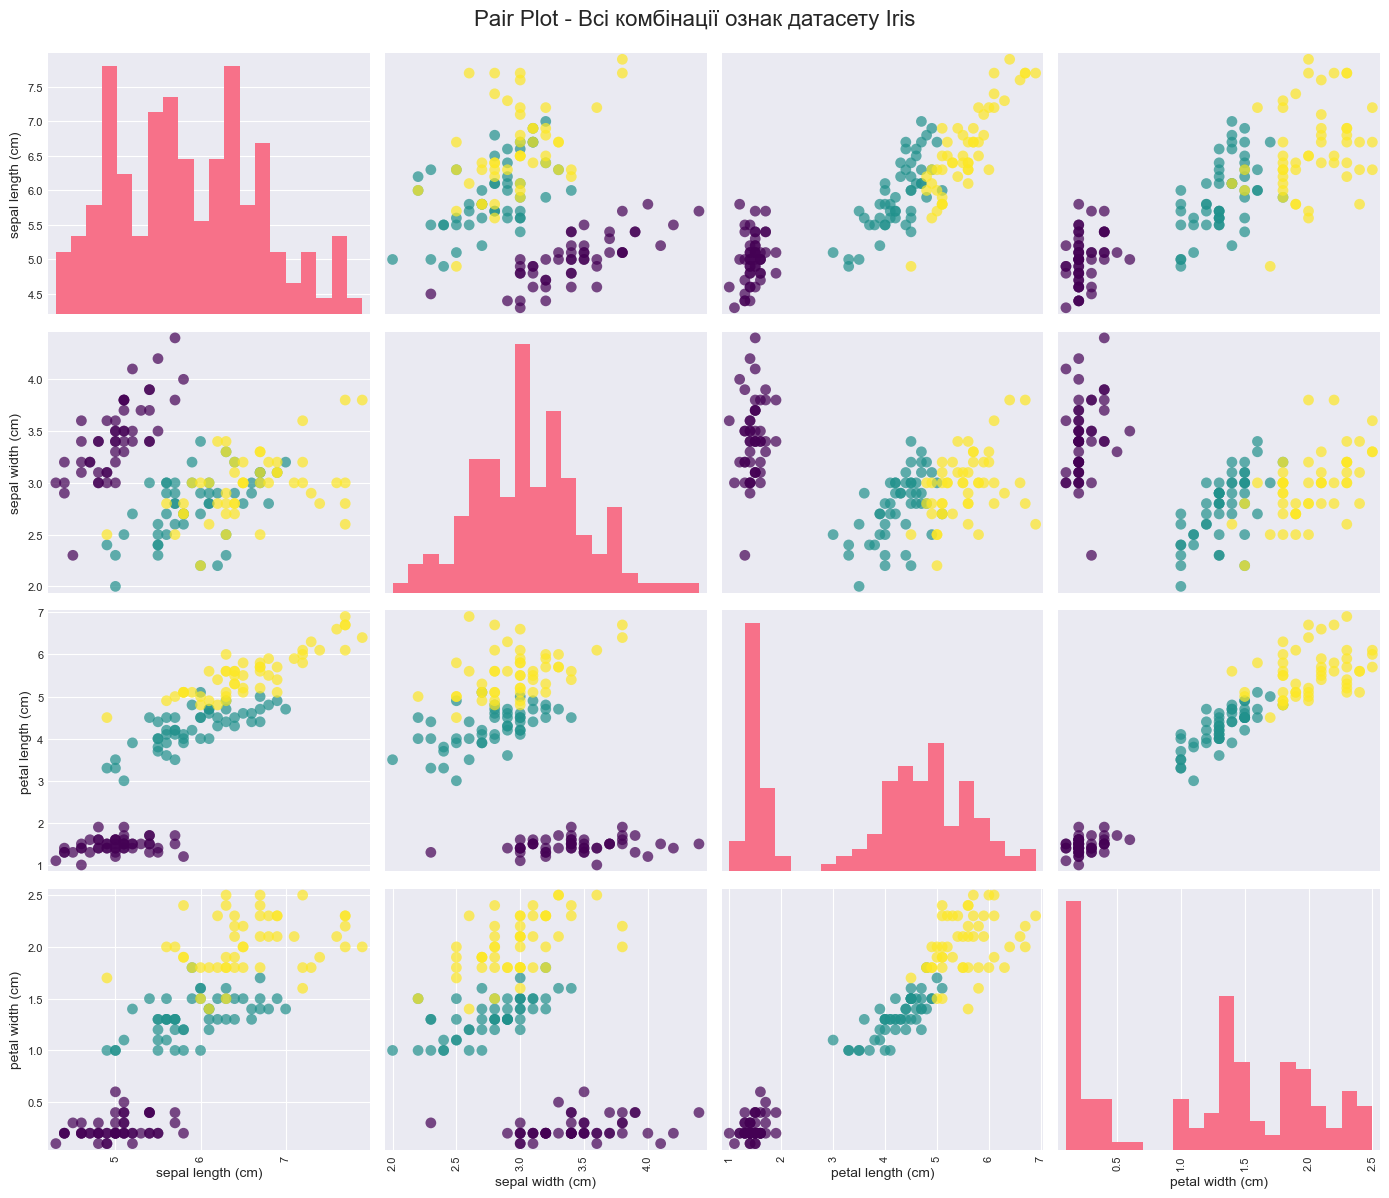

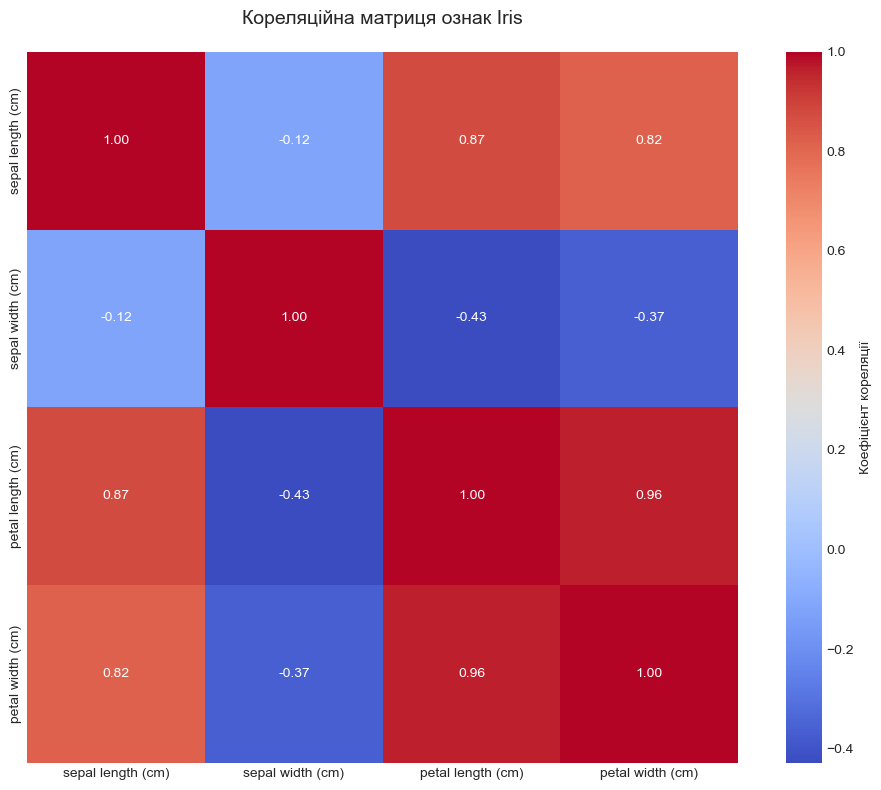

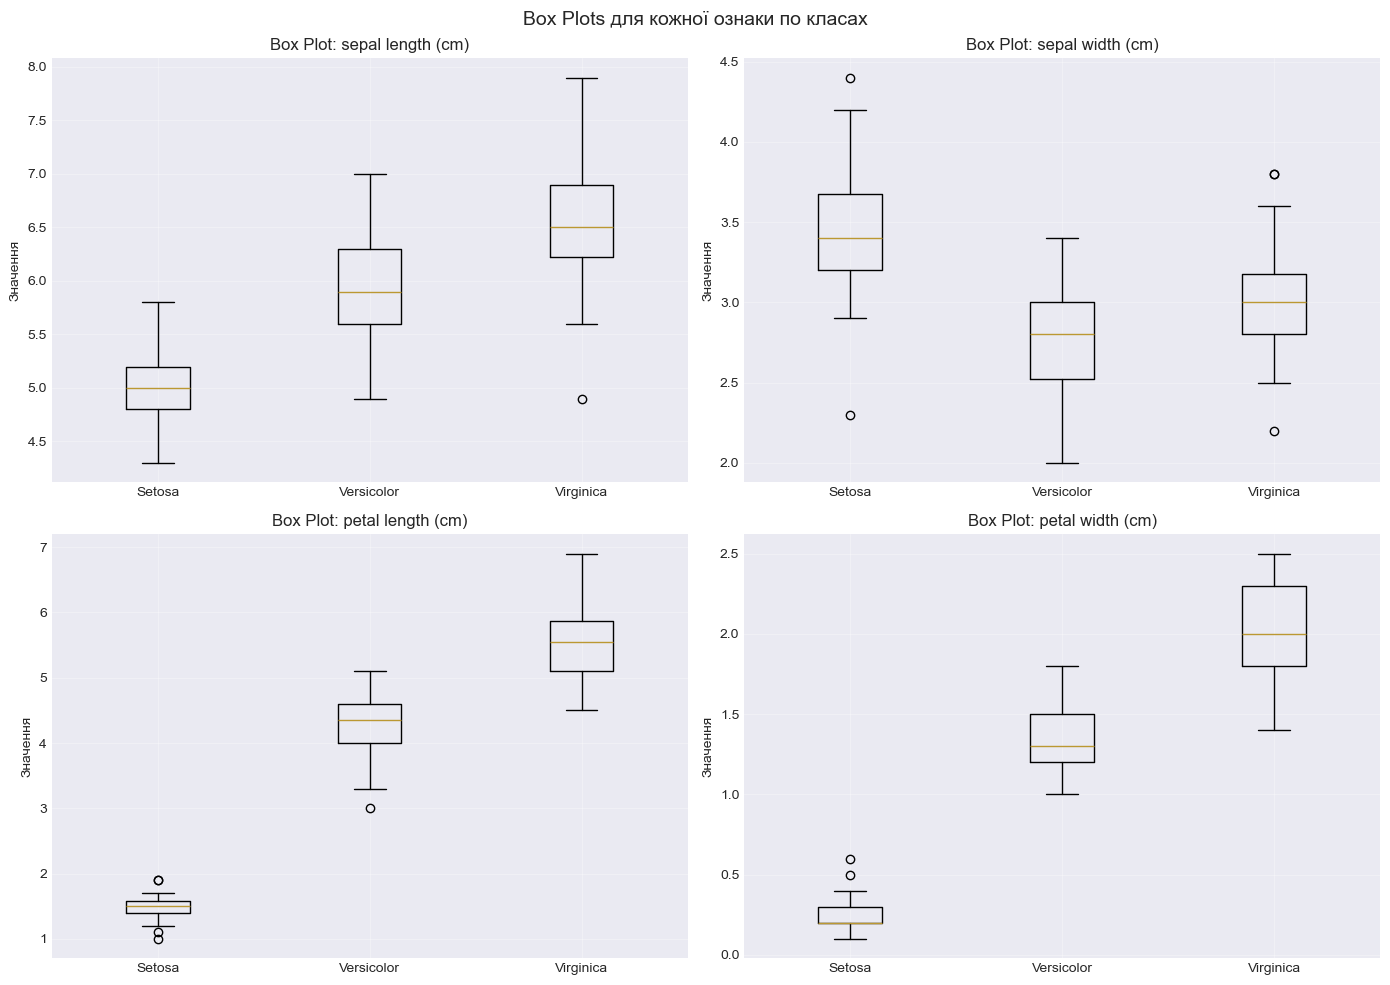

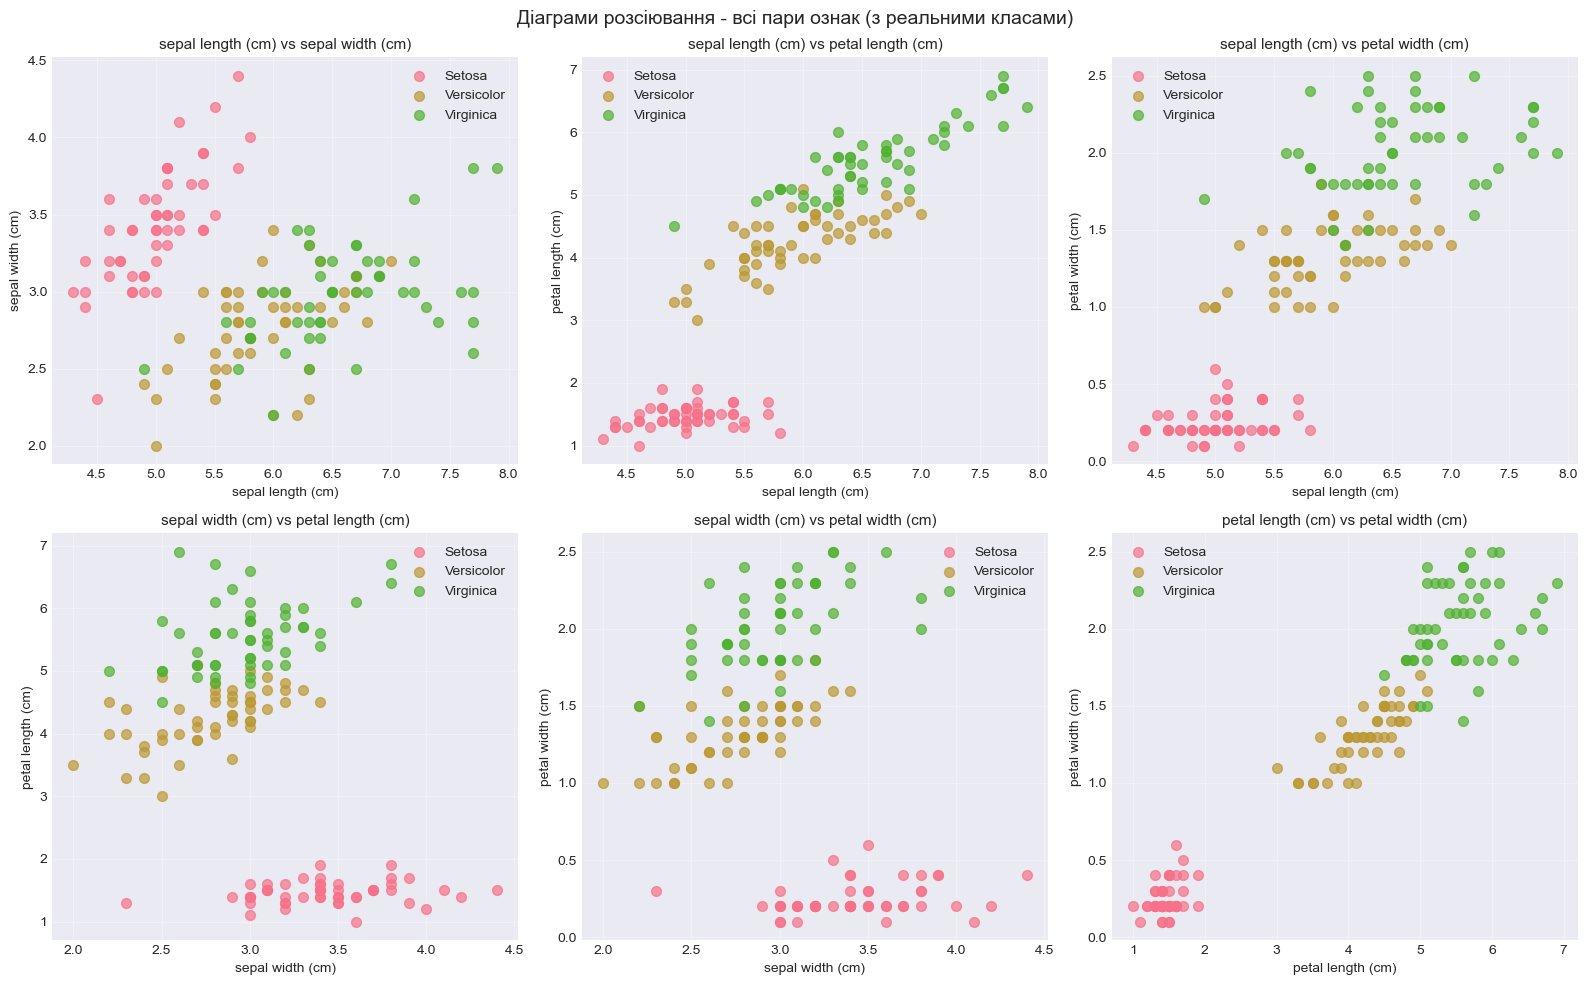

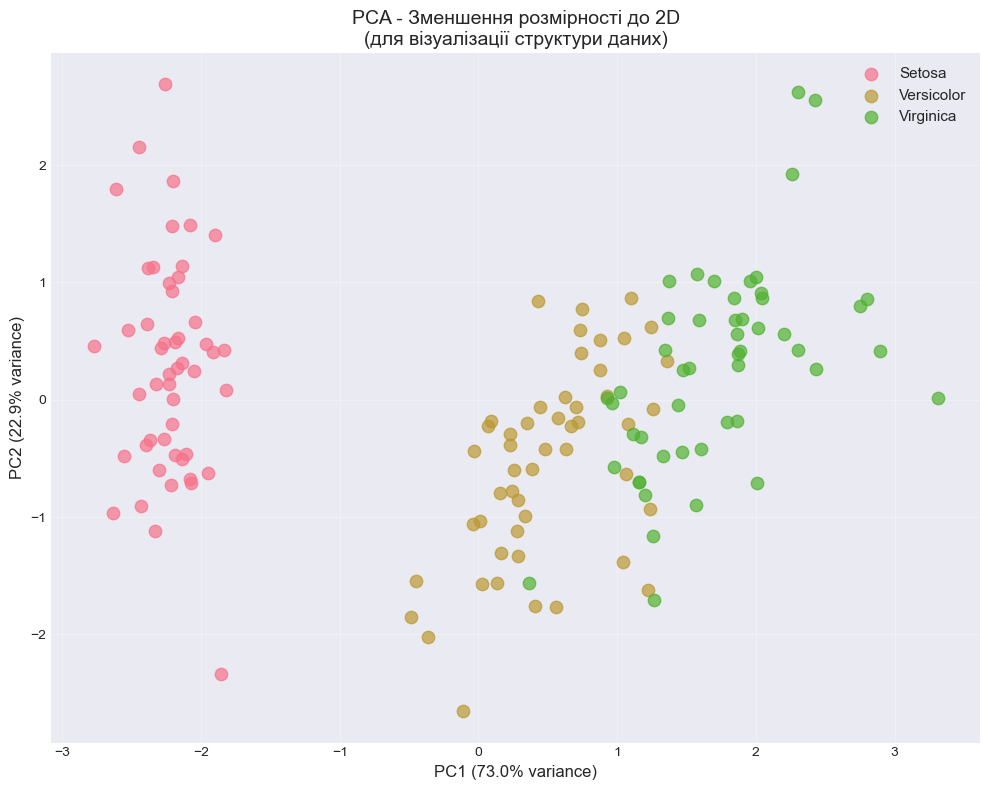

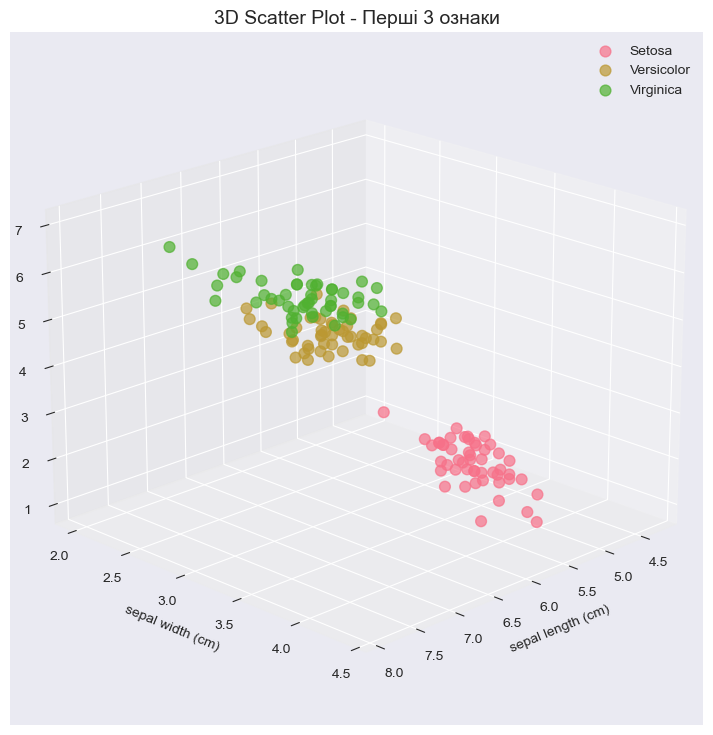

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Встановлення стилю для графіків
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# --- ЗАВАНТАЖЕННЯ ДАНИХ ---
iris_filepath = Path("data/iris_dataset.csv")
df = pd.read_csv(iris_filepath)

# Розділення на ознаки та цільову змінну
X = df.drop('target', axis=1).values
y = df['target'].values
feature_names = df.drop('target', axis=1).columns.tolist()
target_names = ['Setosa', 'Versicolor', 'Virginica']

print("=" * 60)
print("ДАТАСЕТ IRIS - ПЕРВИННИЙ АНАЛІЗ")
print("=" * 60)

# --- ЕКСПЛОРАТОРНИЙ АНАЛІЗ ---
print(f"\nРозмірність даних: {X.shape}")
print(f"Кількість зразків: {X.shape[0]}")
print(f"Кількість ознак: {X.shape[1]}")
print(f"Кількість класів: {len(np.unique(y))}")

print("\n--- Статистичні характеристики ---")
print(df.describe())

print(f"\n--- Перевірка на пропущені значення ---")
missing_values = df.isnull().sum().sum()
print(f"Загальна кількість пропущених значень: {missing_values}")

print("\n--- Кореляційна матриця ---")
correlation_matrix = df.drop('target', axis=1).corr()
print(correlation_matrix)

# --- ВІЗУАЛІЗАЦІЯ 1: Pair Plot ---
fig1 = plt.figure(figsize=(14, 12))
pd.plotting.scatter_matrix(
    df.drop('target', axis=1),
    c=y,
    figsize=(14, 12),
    marker='o',
    hist_kwds={'bins': 20},
    s=60,
    alpha=0.7,
    cmap='viridis'
)
plt.suptitle('Pair Plot - Всі комбінації ознак датасету Iris', 
             fontsize=16, y=0.995)
plt.tight_layout()

# --- ВІЗУАЛІЗАЦІЯ 2: Кореляційна матриця ---
fig2, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', 
            cmap='coolwarm', square=True, ax=ax,
            cbar_kws={'label': 'Коефіцієнт кореляції'})
ax.set_title('Кореляційна матриця ознак Iris', fontsize=14, pad=20)
plt.tight_layout()

# --- ВІЗУАЛІЗАЦІЯ 3: Box Plots ---
fig3, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
for idx, feature in enumerate(feature_names):
    axes[idx].boxplot([df[df['target']==i][feature].values 
                       for i in range(3)],
                      labels=target_names)
    axes[idx].set_title(f'Box Plot: {feature}', fontsize=12)
    axes[idx].set_ylabel('Значення')
    axes[idx].grid(True, alpha=0.3)
plt.suptitle('Box Plots для кожної ознаки по класах', fontsize=14)
plt.tight_layout()

# --- ВІЗУАЛІЗАЦІЯ 4: Scatter plots з реальними мітками ---
fig4, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()
feature_pairs = [
    (0, 1), (0, 2), (0, 3),
    (1, 2), (1, 3), (2, 3)
]

for idx, (i, j) in enumerate(feature_pairs):
    for class_idx, class_name in enumerate(target_names):
        mask = y == class_idx
        axes[idx].scatter(X[mask, i], X[mask, j], 
                         label=class_name, alpha=0.7, s=50)
    
    axes[idx].set_xlabel(feature_names[i], fontsize=10)
    axes[idx].set_ylabel(feature_names[j], fontsize=10)
    axes[idx].set_title(f'{feature_names[i]} vs {feature_names[j]}', 
                       fontsize=11)
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Діаграми розсіювання - всі пари ознак (з реальними класами)', 
             fontsize=14)
plt.tight_layout()

# --- ВІЗУАЛІЗАЦІЯ 5: PCA (2 компоненти) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig5, ax = plt.subplots(figsize=(10, 8))
for class_idx, class_name in enumerate(target_names):
    mask = y == class_idx
    ax.scatter(X_pca[mask, 0], X_pca[mask, 1], 
              label=class_name, alpha=0.7, s=80)

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)', 
              fontsize=12)
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)', 
              fontsize=12)
ax.set_title('PCA - Зменшення розмірності до 2D\n(для візуалізації структури даних)', 
             fontsize=14)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()

print(f"\nPCA пояснена дисперсія:")
print(f"  PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"  PC2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"  Загалом: {sum(pca.explained_variance_ratio_):.2%}")

# --- ВІЗУАЛІЗАЦІЯ 6: 3D Scatter Plot ---
from mpl_toolkits.mplot3d import Axes3D

fig6 = plt.figure(figsize=(12, 9))
ax = fig6.add_subplot(111, projection='3d')

for class_idx, class_name in enumerate(target_names):
    mask = y == class_idx
    ax.scatter(X[mask, 0], X[mask, 1], X[mask, 2],
              label=class_name, alpha=0.7, s=60)

ax.set_xlabel(feature_names[0], fontsize=10)
ax.set_ylabel(feature_names[1], fontsize=10)
ax.set_zlabel(feature_names[2], fontsize=10)
ax.set_title('3D Scatter Plot - Перші 3 ознаки', fontsize=14)
ax.legend(fontsize=10)
ax.view_init(elev=20, azim=45)

print("\n" + "=" * 60)
print("ВІЗУАЛІЗАЦІЯ ЗАВЕРШЕНА")
print("=" * 60)

plt.show()

КРОК 3: ПОБУДОВА БАЗОВОЇ МОДЕЛІ BIRCH

Параметри базової моделі:
  n_clusters: 3
  threshold: 0.5
  branching_factor: 50

Час навчання: 0.0060 секунд
Знайдено кластерів: 3

КРОК 4: ВІЗУАЛІЗАЦІЯ РЕЗУЛЬТАТІВ КЛАСТЕРИЗАЦІЇ


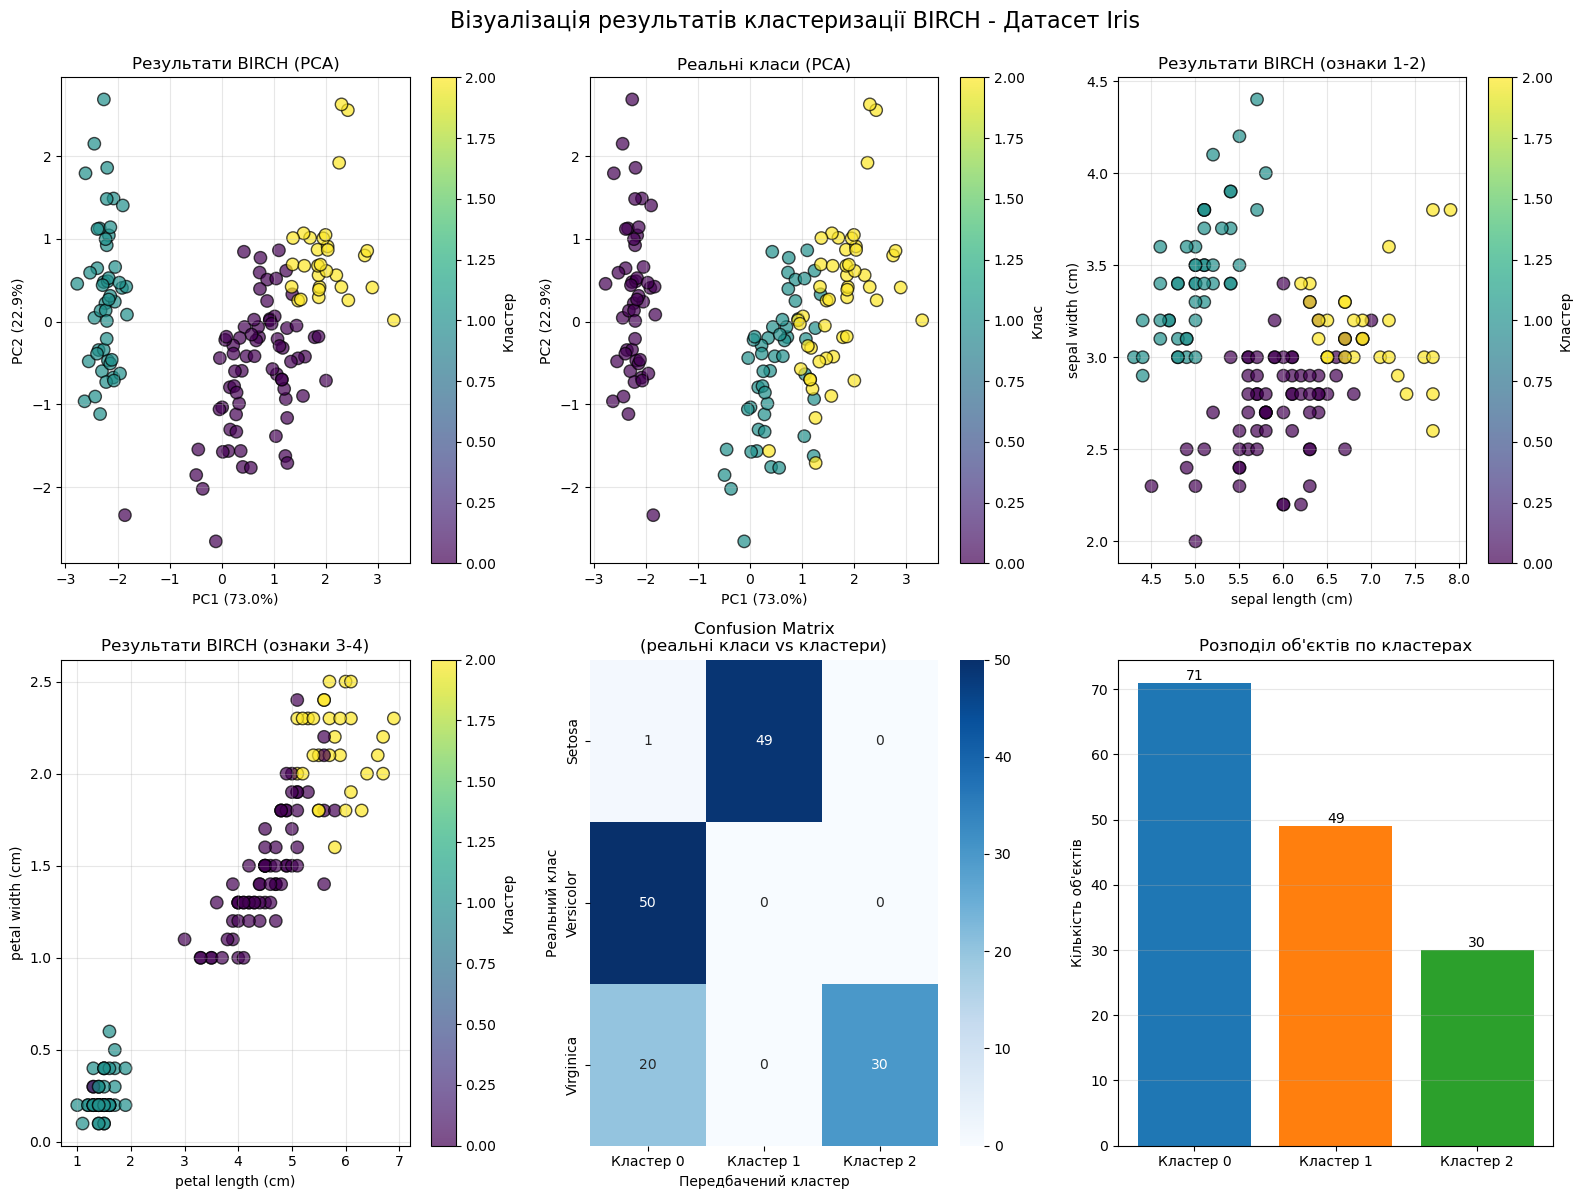


--- Confusion Matrix ---
[[ 1 49  0]
 [50  0  0]
 [20  0 30]]

Інтерпретація:
Setosa: 49/50 об'єктів у кластері 1
Versicolor: 50/50 об'єктів у кластері 0
Virginica: 30/50 об'єктів у кластері 2



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import Birch
from sklearn.metrics import confusion_matrix
import time

iris_filepath = Path("data/iris_dataset.csv")
df = pd.read_csv(iris_filepath)

X = df.drop('target', axis=1).values
y = df['target'].values
feature_names = df.drop('target', axis=1).columns.tolist()
target_names = ['Setosa', 'Versicolor', 'Virginica']

# Стандартизація даних (обов'язково для BIRCH!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("=" * 60)
print("КРОК 3: ПОБУДОВА БАЗОВОЇ МОДЕЛІ BIRCH")
print("=" * 60)

# Базова модель BIRCH
start_time = time.time()
birch_base = Birch(
    n_clusters=3,
    threshold=0.5,
    branching_factor=50
)
labels_base = birch_base.fit_predict(X_scaled)
training_time = time.time() - start_time

print(f"\nПараметри базової моделі:")
print(f"  n_clusters: 3")
print(f"  threshold: 0.5")
print(f"  branching_factor: 50")
print(f"\nЧас навчання: {training_time:.4f} секунд")
print(f"Знайдено кластерів: {len(np.unique(labels_base))}")

print("\n" + "=" * 60)
print("КРОК 4: ВІЗУАЛІЗАЦІЯ РЕЗУЛЬТАТІВ КЛАСТЕРИЗАЦІЇ")
print("=" * 60)

# PCA для візуалізації
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Створення фігури з 4 subplot
fig = plt.figure(figsize=(16, 12))

# 1. PCA - результати кластеризації
ax1 = plt.subplot(2, 3, 1)
scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_base, 
                       cmap='viridis', s=80, alpha=0.7, edgecolors='k')
ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
ax1.set_title('Результати BIRCH (PCA)')
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=ax1, label='Кластер')

# 2. PCA - реальні мітки (для порівняння)
ax2 = plt.subplot(2, 3, 2)
scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=y, 
                       cmap='viridis', s=80, alpha=0.7, edgecolors='k')
ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
ax2.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
ax2.set_title('Реальні класи (PCA)')
ax2.grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=ax2, label='Клас')

# 3. Перші дві ознаки - результати кластеризації
ax3 = plt.subplot(2, 3, 3)
scatter3 = ax3.scatter(X[:, 0], X[:, 1], c=labels_base, 
                       cmap='viridis', s=80, alpha=0.7, edgecolors='k')
ax3.set_xlabel(feature_names[0])
ax3.set_ylabel(feature_names[1])
ax3.set_title('Результати BIRCH (ознаки 1-2)')
ax3.grid(True, alpha=0.3)
plt.colorbar(scatter3, ax=ax3, label='Кластер')

# 4. Третя і четверта ознаки - результати кластеризації
ax4 = plt.subplot(2, 3, 4)
scatter4 = ax4.scatter(X[:, 2], X[:, 3], c=labels_base, 
                       cmap='viridis', s=80, alpha=0.7, edgecolors='k')
ax4.set_xlabel(feature_names[2])
ax4.set_ylabel(feature_names[3])
ax4.set_title('Результати BIRCH (ознаки 3-4)')
ax4.grid(True, alpha=0.3)
plt.colorbar(scatter4, ax=ax4, label='Кластер')

# 5. Confusion Matrix
ax5 = plt.subplot(2, 3, 5)
cm = confusion_matrix(y, labels_base)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax5,
            xticklabels=[f'Кластер {i}' for i in range(3)],
            yticklabels=target_names)
ax5.set_title('Confusion Matrix\n(реальні класи vs кластери)')
ax5.set_ylabel('Реальний клас')
ax5.set_xlabel('Передбачений кластер')

# 6. Розподіл об'єктів по кластерах
ax6 = plt.subplot(2, 3, 6)
unique, counts = np.unique(labels_base, return_counts=True)
bars = ax6.bar([f'Кластер {i}' for i in unique], counts, 
               color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax6.set_title('Розподіл об\'єктів по кластерах')
ax6.set_ylabel('Кількість об\'єктів')
ax6.grid(True, alpha=0.3, axis='y')
for bar in bars:
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom')

plt.suptitle('Візуалізація результатів кластеризації BIRCH - Датасет Iris', 
             fontsize=16, y=0.995)
plt.tight_layout()
plt.show()

# Аналіз confusion matrix
print("\n--- Confusion Matrix ---")
print(cm)
print("\nІнтерпретація:")
for i, class_name in enumerate(target_names):
    cluster_assignment = np.argmax(cm[i, :])
    count = cm[i, cluster_assignment]
    total = np.sum(cm[i, :])
    print(f"{class_name}: {count}/{total} об'єктів у кластері {cluster_assignment}")

print("\n" + "=" * 60)